C:\Users\Meghana setty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 1.060424039992303


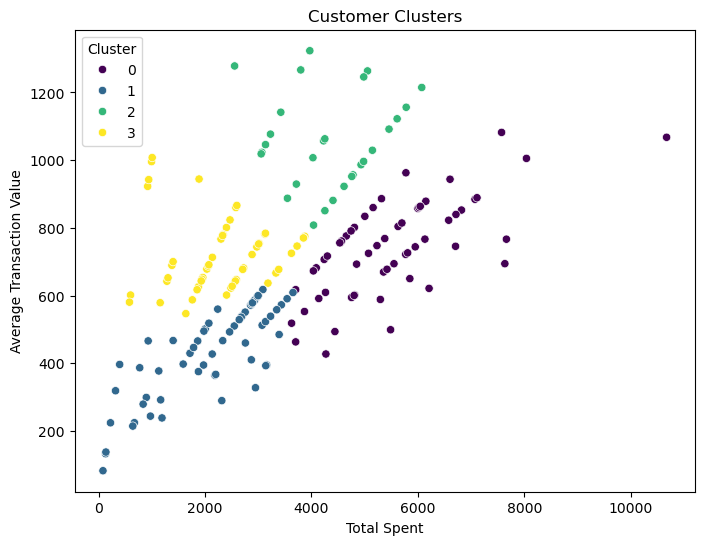

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets on CustomerID
df = transactions.merge(customers, on="CustomerID", how="left")

# Feature Engineering
customer_spending = df.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    avg_transaction_value=("TotalValue", "mean"),
    purchase_frequency=("TransactionID", "count")
).reset_index()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_spending.iloc[:, 1:])

# Apply K-Means clustering
optimal_clusters = 4  # Can be determined using Elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_spending["Cluster"] = kmeans.fit_predict(X_scaled)

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, customer_spending["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

# Visualizing the Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=customer_spending["total_spent"],
    y=customer_spending["avg_transaction_value"],
    hue=customer_spending["Cluster"],
    palette="viridis"
)
plt.xlabel("Total Spent")
plt.ylabel("Average Transaction Value")
plt.title("Customer Clusters")
plt.show()

# Save results
customer_spending.to_csv("Customer_Clusters.csv", index=False)
